# Интернет-магазин компьютерных игр

## Описание проекта
<br>
Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
 


Описание данных: <br>
•	Name — название игры <br>
•	Platform — платформа <br>
•	Year_of_Release — год выпуска <br>
•	Genre — жанр игры <br> 
•	NA_sales — продажи в Северной Америке (млн проданных копий) <br>
•	EU_sales — продажи в Европе (млн проданных копий) <br>
•	JP_sales — продажи в Японии (млн проданных копий) <br>
•	Other_sales — продажи в других странах (млн проданных копий) <br>
•	Critic_Score — оценка критиков (максимум 100) <br>
•	User_Score — оценка пользователей (максимум 10) <br>
•	Rating — рейтинг от организации ESRB  


## Обзор  и подготовка данных

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()
def obzor (d, n):
    return pd.concat([d.head(n), d.sample(n, random_state=42), d.tail(n)], axis=0)
obzor(df, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,Sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN
5500,Etrian Odyssey,DS,2007.0,Role-Playing,0.19,0.02,0.09,0.02,75.0,8.5,T
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Загрузили датафрейм . Просмотрели инфо и по 7 строк начальных, конечных и рандомных. 16715 строк, сразу бросаются в глаза целых 50% пропусков у  Critic_Score, поменьше у User_score и Rating. Далее привести названия столбцов к нижнему регистру. Тип данных User_score - object - поменять. <br>


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.columns = df.columns.str.lower()
df['genre'] = df['genre'].str.lower()
df = df.rename(columns={'year_of_release':'year_release'})

In [6]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



Добавили новый столбец sales с суммарными продажами по всем регионам. <br>

In [7]:
df.duplicated().sum()

0

Дубликатов нет.


In [8]:
df.isna().mean()

name            0.000120
platform        0.000000
year_release    0.016093
genre           0.000120
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.513192
user_score      0.400897
rating          0.404786
sales           0.000000
dtype: float64


Считаем долю пропусков по всем столбцам. Большое их количество в трёх столбцах, описывающих оценки и рейтинг игр. Нужно решить оставить их или заполнить. <br>

In [9]:
df['platform'].value_counts(normalize=True)

PS2     0.129285
DS      0.128687
PS3     0.079629
Wii     0.078971
X360    0.075501
PSP     0.072330
PS      0.071612
PC      0.058271
XB      0.049297
GBA     0.049177
GC      0.033264
3DS     0.031110
PSV     0.025725
PS4     0.023452
N64     0.019085
XOne    0.014777
SNES    0.014299
SAT     0.010350
WiiU    0.008794
2600    0.007957
GB      0.005863
NES     0.005863
DC      0.003111
GEN     0.001735
NG      0.000718
SCD     0.000359
WS      0.000359
3DO     0.000179
TG16    0.000120
PCFX    0.000060
GG      0.000060
Name: platform, dtype: float64


Здесь смотрим список платформ, проверяем варианты написания. Заодно сразу оцениваем популярность каждой из них. <br>

In [10]:
df['genre'].unique() 

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Здесь смотрим список жанров, проверяем варианты написания.

In [11]:
df.query('user_score == "tbd"')

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
119,Zumba Fitness,Wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


В задании упомянуто про значение tbd в колонке user_score - оценка еще не определена. По своему смыслу оно похоже на nan. Нашли, что оно встречается в 2424 строках. 

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float') 

In [13]:
obzor(df, 7)

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
3485,London 2012: The Official Video Game of the Ol...,X360,2012.0,sports,0.07,0.44,0.00,0.07,NaN,NaN,NaN,0.58
5500,Etrian Odyssey,DS,2007.0,role-playing,0.19,0.02,0.09,0.02,75.0,8.5,T,0.32
16713,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Смотрим наш отредактированный дф, готовый к анализу.

In [14]:
df.describe()

,year_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Привели названия столбцов и genre к нижнему регистру. Переименовали столбец с годом релиза. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец sales.<br>
Столбец год выпуска игры 1,6% пропусков - можно не удалять. Очень много пропусков в critic_score - 51%, user_score и rating - 40%. Пропуски заполнять не будем, медиана и среднее, конечно, не подходят. <br>
'tbd' в столбце user_score - значит to be determined, решение еще не принято и будет определено позднее. Может, недостаточное количество отзывов для расчета. Всего строк 2424, что составляет около 14,5%. Заменили на Nan. Также тип данных столбца - object - заменили на float. <br>


## Исследовательский анализ данных

### Количество выпущенных игр

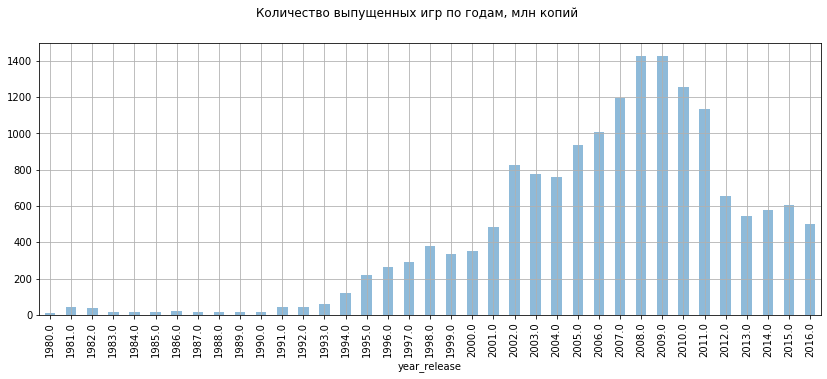

In [15]:
df.groupby('year_release')['sales'].agg(['count']).plot(
        kind='bar', figsize = (14,5), legend=False, grid=True, alpha=0.5) 
plt.suptitle('Количество выпущенных игр по годам, млн копий')
plt.show()

На графике видно, что количество игр c 1990 до 2009 г постоянно росло, а также резко увеличивалось: <br> 
1. в 1994-95 гг - с распространением домашних персональных компьютеров <br> 
2. в 2002 г - с распространением PS2. <br> 

Пик  достигнут в 2008-09 гг. <br> Далее идет спад, скорее всего это связано с распространением интернета, смартфонов, планшетов, соцсетей.<br>  В 2012 г виден спад примерно 40%. 


In [16]:
df['year_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [17]:
df['year_release'] = df['year_release'].astype('Int64')

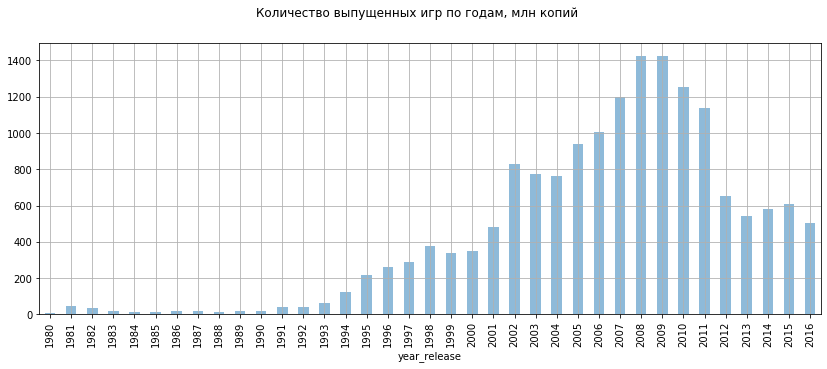

In [18]:
# сохраним наши лейблы

labels = df.groupby('year_release')['sales'].count().index

# сохраним график в переменную, чтобы потом редактировать его свойства
ax = df.groupby('year_release')['sales'].agg(['count']).plot(
        kind='bar', figsize = (14,5), legend=False, grid=True, alpha=0.5) 
plt.suptitle('Количество выпущенных игр по годам, млн копий')
# устанаваливаем подписи вручную
ax.set_xticklabels(labels)
plt.show()

<hr style="border: 1px solid #000;"> 

### Продажи по платформам

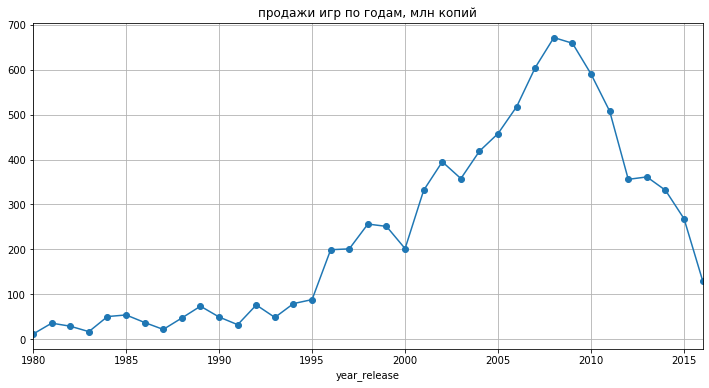

In [19]:
df.groupby('year_release')['sales'].sum().plot(x='year_of_release', y='sales', style = 'o-',
                          figsize = (12, 6), grid = True, title = 'продажи игр по годам, млн копий')
plt.show()

Смотрим сколько игр на каких платформах продавалось в разные годы. Видно, что продажи резко увеличивались с выходом новых платформ. 1995-96 вышла первая PS, в 2000-01 - вторая. В 2005 г появляется платформа DS Nintendo, в 2006 г - Wii, X360 и PS3, что обеспечило рекордные продажи в 2008-09 гг.

In [20]:
df['platform'].nunique()

31

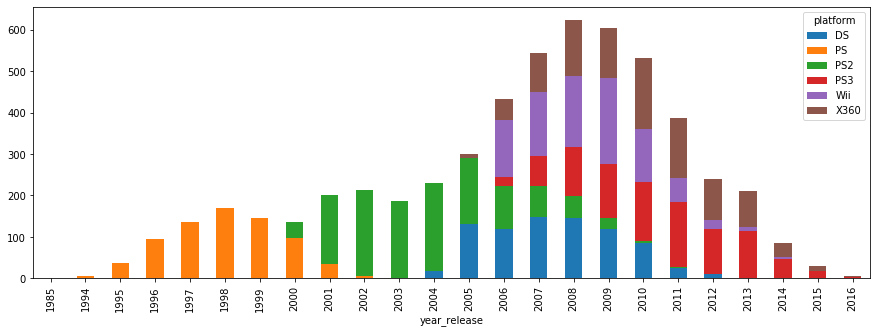

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
platforms_top = ['PS2','X360','PS3','Wii','DS', 'PS']
pd.pivot_table(df.query('platform.isin(@platforms_top)'),
              index = 'year_release',
              columns = 'platform',
              values = 'sales',
              aggfunc = 'sum').plot(ax = ax, kind = 'bar', stacked = True)

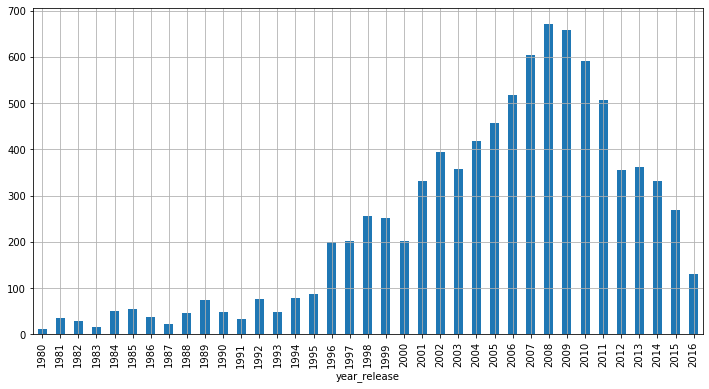

In [22]:
df.groupby('year_release')['sales'].sum().plot(kind='bar', figsize = (12, 6), grid = True, stacked=True)
plt.show()

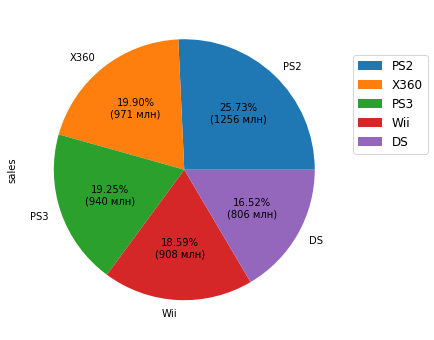

In [23]:
# посчитаем общую величину круга
# в данном случае, сумму продаж по всем 5 топовым платформам
# цель - относительно этого значения высчитывать абсолютную долю

sales_sum = df.pivot_table(index='platform', values ='sales', 
                        aggfunc='sum').sort_values(by = 'sales',
                        ascending = False).head().sum()

def func_pct(pct):
    # высчитываем абсолютную долю
    value = float(pct/100.*sales_sum)
    # возвращаем подпись в формате "30,16%
    #                              "(100 млн)"
    return "{:.2f}%\n({:.0f} млн)".format(pct, value)


df.pivot_table(index='platform', values ='sales', 
                        aggfunc='sum').sort_values(by = 'sales',
                        ascending = False).head().plot(kind='pie', figsize = (16,6), subplots=True,
                                                       autopct=lambda pct: func_pct(pct))

# выравниваем положение легенды
plt.legend(bbox_to_anchor=(1,0.87), prop={'size':12})

plt.show()

<hr style="border: 1px solid #000;"> 

In [24]:
df.pivot_table(index='platform', values ='sales', 
                        aggfunc='sum').sort_values(by = 'sales',
                        ascending = False).head(10)

,sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Больше всего продаются игры для PS2, PS3, X360, Wii, DS.

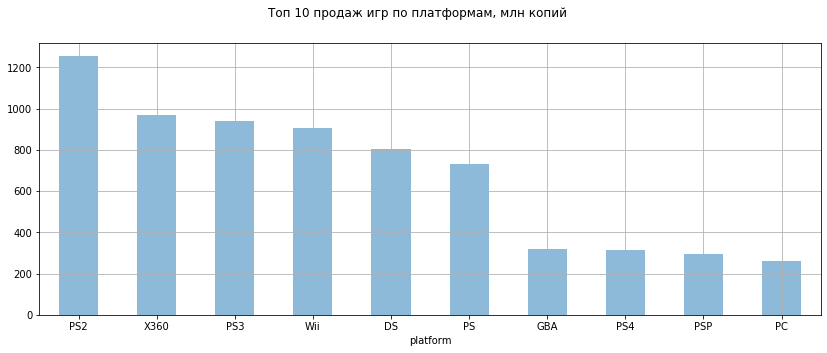

In [25]:
df.pivot_table(index='platform', values ='sales', 
                        aggfunc='sum').sort_values(by = 'sales',
                        ascending = False).head(10).plot(kind='bar', figsize = (14,5), 
                                                         legend=False, grid=True, alpha=0.5, rot=0)
plt.suptitle('Топ 10 продаж игр по платформам, млн копий')
plt.show()

Топ-6 платформ с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS, PS. Выбрали первые шесть, так как у седьмого места резкий спад по продажам. Построим распределение по годам. 
 

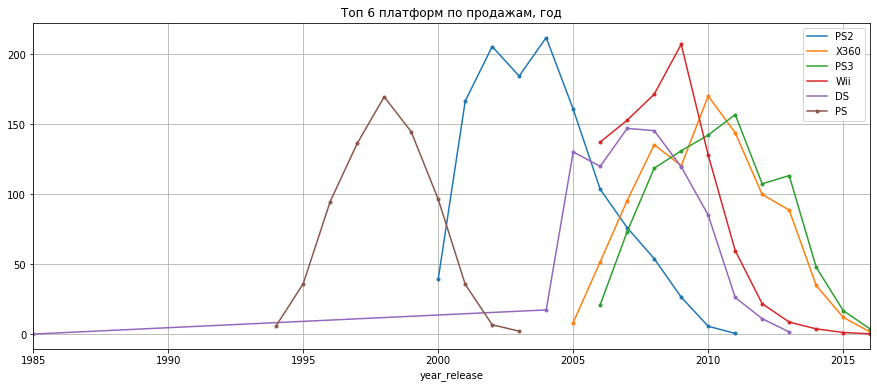

In [26]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    df_platform = df.query('platform == @platform')
    df_platform.groupby('year_release')['sales'].sum().plot(
        x='year_release', y='sales', label=platform, style='.-', kind='line', grid=True, figsize=(15, 6), 
        title = 'Топ 6 платформ по продажам, год', legend=True)
 

На графике сразу видно за какой характерный срок появляются новые и исчезают старые платформы - около 10 лет. Пик Популярности наступает через 5 лет после релиза. И это естественно, ведь с появлением новых платформ старые себя изживают. <br>
PS - жила c 1994 по 2003 г. Похоже на нормальное распределение. <br> 
PS2 - 2000-11. Два пика в 2002 и 2004. <br>
DS - популярность растет с 2004, пик 2007-08 гг, далее падение к 2013 <br> 
X360 - 2006-16. Два пика в 2007 и 2010. <br>
Wii - 2006-16. Причем видно пик в 2009 и последущий резкий провал, связанный с распространением мобильных игр. <br> 
PS3 - 2006-16. В конце 2013 г вышла PS4 и сразу видно падение продаж. <br> 

### Продажи в актуальный период

Актуальный период определим на основе исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Возьмем период 10 лет, с 2006 года - когда вышли 5 основных платформ из топ6 - и до 2016.

In [27]:
platforms = df['platform'].unique()
platforms

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
df_platform = df.query('platform.isin(@platforms) and year_release >= 2006')

<hr style="border: 1px solid #000;"> 

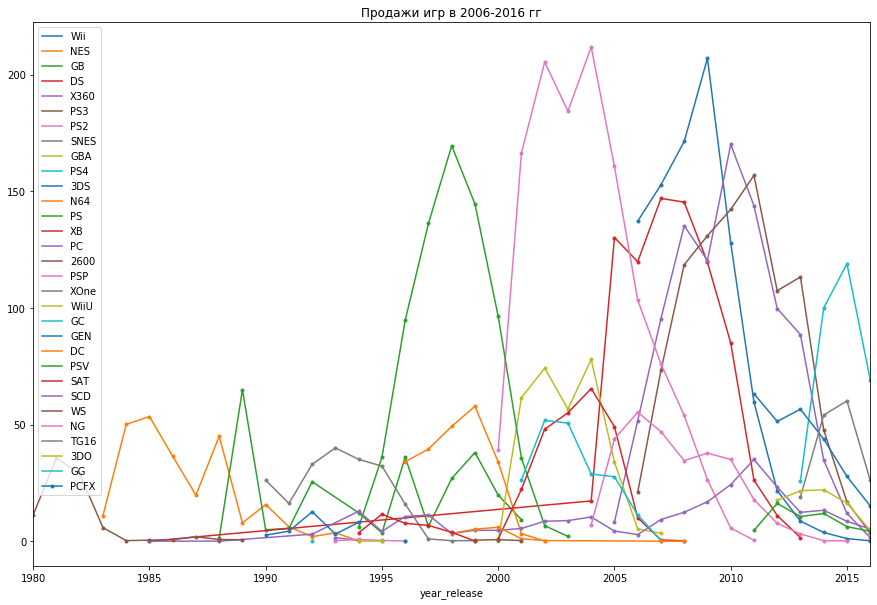

In [29]:
for platform in platforms:
    df_platform = df.query('platform == @platform')
    df_platform.groupby('year_release')['sales'].sum().plot(
        x='year_release', y='sales', label=platform, style='.-', kind='line', figsize=(15, 10), 
        title = 'Продажи игр в 2006-2016 гг', legend=True)

На конец 2016 года лидируют платформы PS4, XOne и 3DS. В целом весь рынок падает. Видно, что срок жизни PS4 и XOne уже составляет 5 лет, к пику они пришли за 2 года.

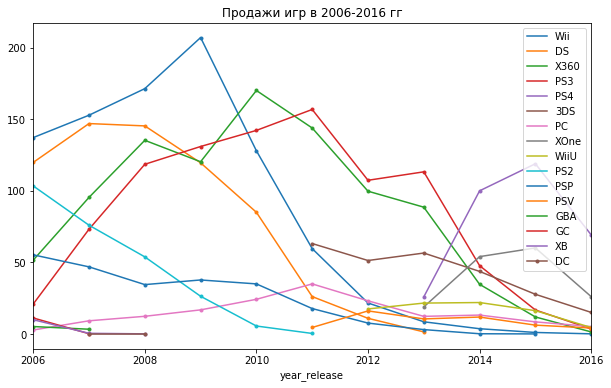

In [30]:
# сформируем новый датафрейм на базе начального, где все данные будут от 2006 года
# цель - не обращаться на каждой итерации к начальному датафрейму и не фильтровать его заново - это трудоёмко,
# тем более когда можно всё отфильтровать один раз
df_2006 = df.query('year_release >= 2006')

# вот тут берём новый список платформ - у которых были продажи, начиная с 2006 года
for platform in df_2006['platform'].unique():
    df_platform = df_2006.query('platform == @platform')
    df_platform.groupby('year_release')['sales'].sum().plot(
        x='year_release', y='sales', label=platform, style='.-', kind='line', figsize=(10, 6), 
        title = 'Продажи игр в 2006-2016 гг', legend=True)
    


<hr style="border: 1px solid #000;">

### Боксплот по глобальным продажам игр 

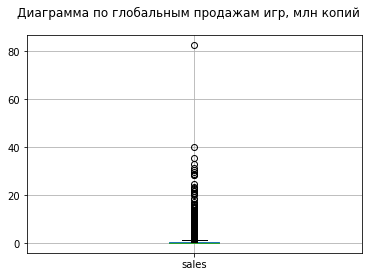

In [31]:
df.boxplot(column='sales', grid = True)
plt.suptitle('Диаграмма по глобальным продажам игр, млн копий')
plt.show()

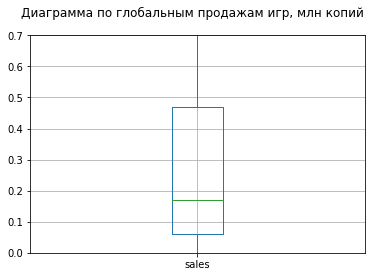

In [32]:
df.boxplot(column='sales', grid = True)
plt.suptitle('Диаграмма по глобальным продажам игр, млн копий')
plt.ylim(0, 0.7)
plt.show()

В среднем продажи игр составляют от 60 до 460 тыс копий. Медиана 170 тыс. Много выбросов свыше 1 млн.

In [33]:
platforms6 = ['PS2','X360','PS3','Wii','DS', 'PS']
df_platforms6 = df[df['platform'].isin(['PS2','X360','PS3','Wii','DS', 'PS'])]
#df_platforms6 = df_platforms6[df_platforms6['year_release'] >= 2006]


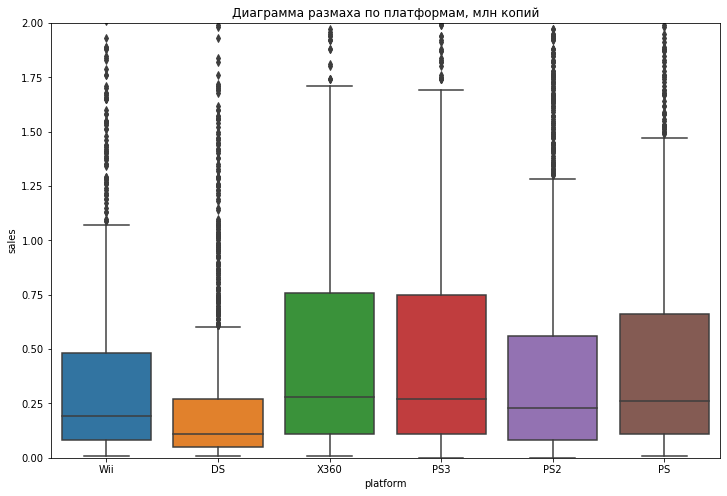

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_platforms6, x='platform', y='sales')
plt.ylim(0, 2)
plt.title('Диаграмма размаха по платформам, млн копий')
plt.show()

Медиана у пяти платформ находится в пределе от 200 до 260 тысяч, у  DS - 100 тысяч. <br>
Верхняя граница X360 и PS3 - 1,75 млн; PS - 1,45 млн; PS2 - 1,3 млн; Wii - 1,1 млн; DS - 600 тыс. Далее идут выбросы. <br>
В среднем продажи игр X360 и PS3 составляют от 100 до 760 тыс копий. PS2 - от 100 до 550 тыс. PS - от 150 до 650 тыс. Wii - от 100 до 480 тыс. DS - от 50 до 250 тыс.

### Корреляция между отзывами и продажами

Посмотрим, как влияют отзывы пользователей и критиков на продажи платформы PS3.  

In [35]:
sony_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)]

In [36]:
sony_ps3['critic_score'].corr(sony_ps3['sales'])

0.43243156856420634

Корреляция между рейтингом критиков и продажами умеренная.

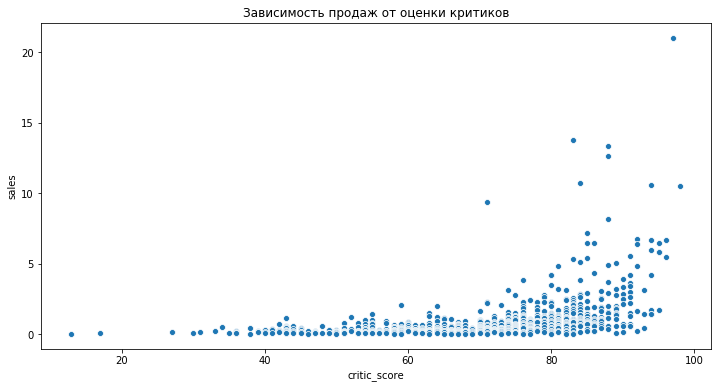

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales', data=sony_ps3)
plt.title('Зависимость продаж от оценки критиков')
plt.show()

С увеличением средней оценки критиков увеличиваются и продажи игр. У игр со средним рейтингом нет выбросов.

In [38]:
sony_ps3 = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)]
sony_ps3['user_score'].corr(sony_ps3['sales'])

0.12669133936341692

Коэффициент корреляции низкий. Зависимость слабая.

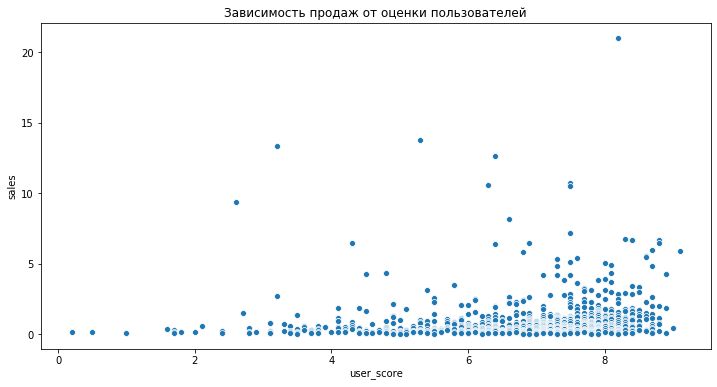

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales', data=sony_ps3)
plt.title('Зависимость продаж от оценки пользователей')
plt.show()

С увеличением средней оценки критиков продажи игр слегка увеличиваются, здесь зависимость слабее, практически не влияет. Есть выбросы у игр с низким рейтингом. Например, игры с рейтингом 4 и 8 могут могут продаваться одинаково. Посмотрим еще пару платформ.

In [40]:
x360_corr = df[(df['platform'] == 'X360') & (df['critic_score'] > 0)]
x360_corr['critic_score'].corr(x360_corr['sales'])

0.3937358653072584

In [41]:
x360_corr = df[(df['platform'] == 'X360') & (df['user_score'] > 0)]
x360_corr['user_score'].corr(x360_corr['sales'])

0.11445882978454186

У платформы X360 картина идентична PS3.

In [42]:
wii_corr = df[(df['platform'] == 'Wii') & (df['critic_score'] > 0)]
wii_corr['critic_score'].corr(wii_corr['sales'])

0.17755988806089956

In [43]:
wii_corr = df[(df['platform'] == 'Wii') & (df['user_score'] > 0)]
wii_corr['user_score'].corr(wii_corr['sales'])

0.11241436067003163

У платформы Wii слабая корреляция продаж с отзывами.

In [44]:
ps4_corr = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0)]
ps4_corr['critic_score'].corr(ps4_corr['sales'])

0.40656790206178095

In [45]:
ps4_corr = df[(df['platform'] == 'PS4') & (df['user_score'] > 0)]
ps4_corr['user_score'].corr(ps4_corr['sales'])

-0.031957110204556376

Отрицательная корреляция рейтинга пользователей с продажами PS4 скорее всего говорит нам о недостаточном объеме отзывов.

Оценка пользователей слабо влияет на продажи, больше влияния имеет оценка критиков. Естественно, что пользователи часто совершают покупку на основе подробного обзора специалистов.

In [46]:
top10_corr = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

def corr_defin(name_of_platform):
    platform = df[df['platform'] == name_of_platform]
    user_corr = platform['user_score'].corr(platform['sales'])
    critic_corr = platform['critic_score'].corr(platform['sales'])
    
    print(f'Корреляция между оценками пользователей и продажами (платформа {name_of_platform}) - {round(user_corr, 3)}')
    print(f'Корреляция между оценками критиков и продажами (платформа {name_of_platform}) - {round(critic_corr, 3)}')
    print('-----------------------------------------------------------------------------')

In [47]:
for platform in top10_corr:
    corr_defin(platform)

Корреляция между оценками пользователей и продажами (платформа PS2) - 0.173
Корреляция между оценками критиков и продажами (платформа PS2) - 0.395
-----------------------------------------------------------------------------
Корреляция между оценками пользователей и продажами (платформа X360) - 0.114
Корреляция между оценками критиков и продажами (платформа X360) - 0.394
-----------------------------------------------------------------------------
Корреляция между оценками пользователей и продажами (платформа PS3) - 0.127
Корреляция между оценками критиков и продажами (платформа PS3) - 0.432
-----------------------------------------------------------------------------
Корреляция между оценками пользователей и продажами (платформа Wii) - 0.112
Корреляция между оценками критиков и продажами (платформа Wii) - 0.178
-----------------------------------------------------------------------------
Корреляция между оценками пользователей и продажами (платформа DS) - 0.13
Корреляция между оценкам

### Распределение игр по жанрам

In [48]:
#df.pivot_table(index='genre', values ='sales',aggfunc='count').sort_values(by = 'sales', ascending = False)


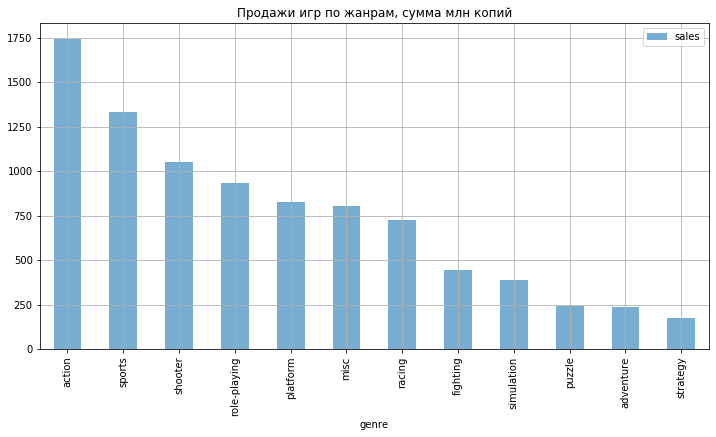

In [49]:
df.pivot_table(index='genre', values ='sales', aggfunc='sum').sort_values(
    by = 'sales', ascending = False).plot(kind='bar', grid=True, figsize=(12,6), alpha=0.6)

plt.title('Продажи игр по жанрам, сумма млн копий')
plt.show()

Самые популярные жанры - action, sports, shooter. <br>
Аутсайдеры - puzzle, adventure, strategy.

Количество игр c 1990 до 2009 г постоянно росло, но с распространением смартфонов и интернета значительно уменьшалось. <br>
Самые популярные платформы: Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation. <br>
Жизненный цикл платформы составляет 10 лет. Пик продаж наступает через 5 лет после релиза. <br> 
На конец 2016 года лидируют платформы PS4, XOne и 3DS. В целом весь рынок падает. <br>
Пользователи при покупке ориентируются на оценки критиков. <br>
Самые популярные жанры - action, sports, shooter.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

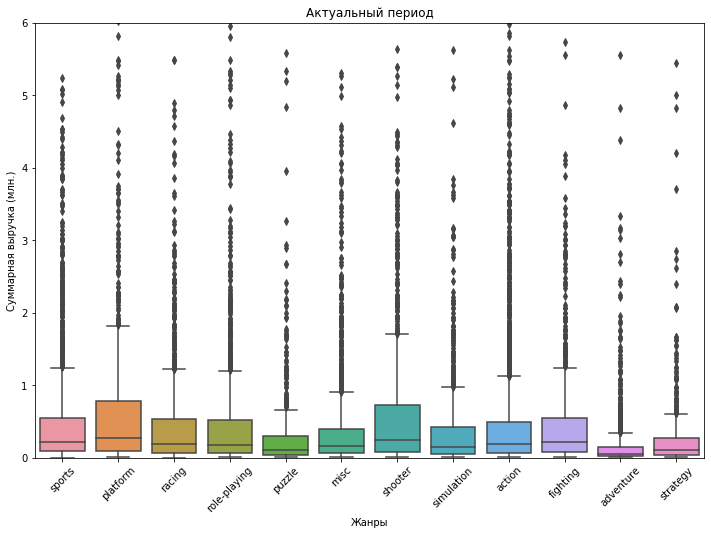

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='sales', data=df)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 6])
plt.xticks(rotation=45)

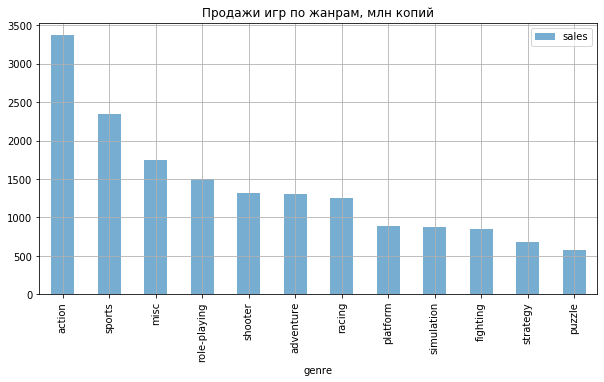

In [51]:
df.pivot_table(index='genre', values ='sales', aggfunc='count').sort_values(
    by = 'sales', ascending = False).plot(kind='bar', grid=True, figsize=(10,5), alpha=0.6)
plt.title('Продажи игр по жанрам, млн копий')
plt.show()

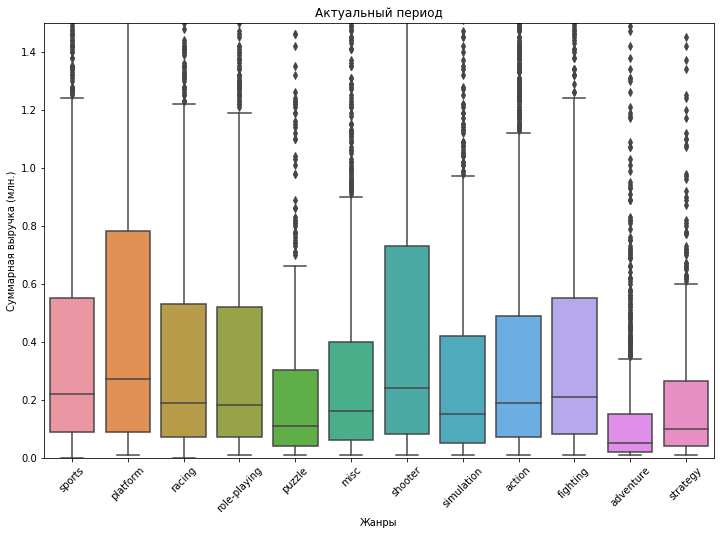

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='sales', data=df)
plt.xlabel('Жанры')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 1.5])
plt.xticks(rotation=45)
plt.show()

Ранее нашли самые популярные жанры - action, sports, shooter. Аутсайдеры - puzzle, adventure, strategy. <br> 
    <br> 
По боксплоту видно, что аутсайдеры те же. У них и выбросов не так много, и ящики маленькие.   <br> 
У экшена, спорта и шутера - очень много выбросов. В среднем продажи игр жанра спорт от 100 до 550 тыс копий; экшн - от 90 до 500 тыс копий. Медиана 200-210 тыс.  <br> 
<br> А максимальный 3й квартиль - платформеры и шутеры! У них же и самое высокое максимальное значение. <br> 
а у платформеров - от 100 до 750,  шутеров от 90 до 700 тыс. Медиана выше 220-270 тыс. <br>



## Портрет пользователя каждого региона

### Топ-5 платформ

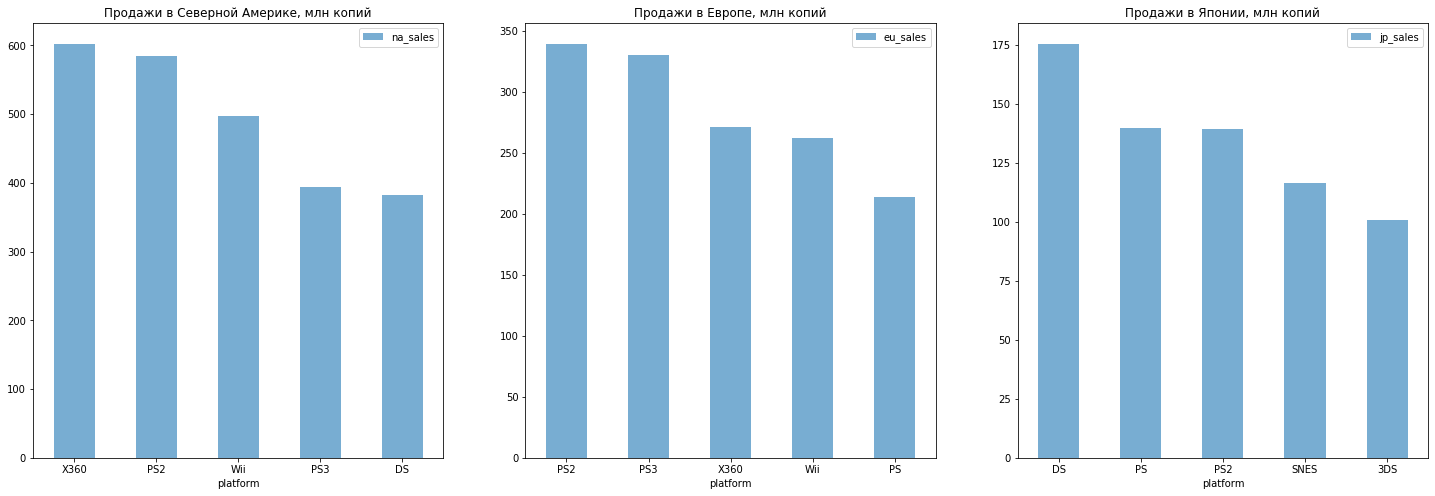

In [53]:
# В функцию на вход даем ещё один параметр - позицию для отрисовки на поле. Назовем этот параметр ax

def grafik_region_top5(groupby, region_sales, ax):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False).head()
    title_dict = {'na_sales': 'Продажи в Северной Америке, млн копий',
                  'eu_sales': 'Продажи в Европе, млн копий', 'jp_sales': 'Продажи в Японии, млн копий'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], alpha=0.6, rot=0,
                      #говорим где рисовать график
                      ax = axes[ax])
    # axes создадим при выводе графиков далее
    
fig, axes = plt.subplots(1, 3, figsize=(25,8))

grafik_region_top5('platform', 'na_sales', 0)
grafik_region_top5('platform', 'eu_sales', 1)
grafik_region_top5('platform', 'jp_sales', 2)

In [54]:
def grafik_region(groupby, region_sales):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False).head()
    title_dict = {'na_sales': 'Продажи в Северной Америке, млн копий',
                  'eu_sales': 'Продажи в Европе, млн копий', 'jp_sales': 'Продажи в Японии, млн копий'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], alpha=0.6, rot=0)

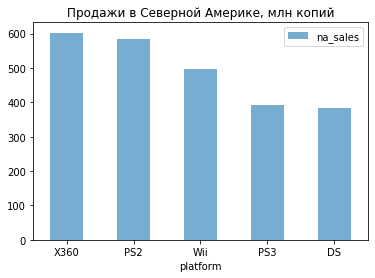

In [55]:
grafik_region('platform', 'na_sales')

В Северной Америке наиболее популярны X360 и PS2 - около 600 млн копий. Затем Wii - примерно меньше на 15%, PS3 и DS - на 30%.

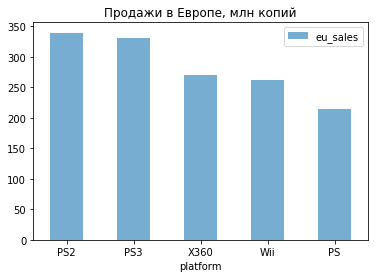

In [56]:
grafik_region('platform', 'eu_sales')

В Европе лидируют PS2 и PS3 - около 340 млн копий. Затем X360, Wii - около 260 млн и PS - 210 млн.

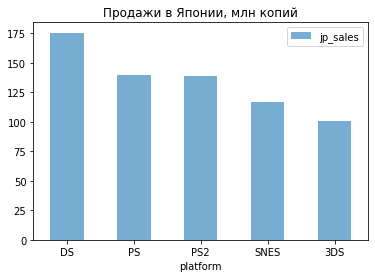

In [57]:
grafik_region('platform', 'jp_sales')

В Японии своя атмосфера. Лидирует предсказуемо DS - 175 млн копий. Затем идут PS и PS2 - ниже на 25%. А вот далее - SNES и 3DS.

### Топ-5 жанров

In [58]:
# В функцию на вход даем ещё один параметр - позицию для отрисовки на поле. Назовем этот параметр ax

def grafik_region_test(groupby, region_sales, ax):
    pivot = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False).head()
    title_dict = {'na_sales': 'Продажи в Северной Америке, млн копий',
                  'eu_sales': 'Продажи в Европе, млн копий', 'jp_sales': 'Продажи в Японии, млн копий'}
    plot = pivot.plot(kind='bar', title=title_dict[region_sales], alpha=0.6, rot=0,
                      #говорим где рисовать график
                      ax = axes[ax])
    # axes создадим при выводе графиков далее

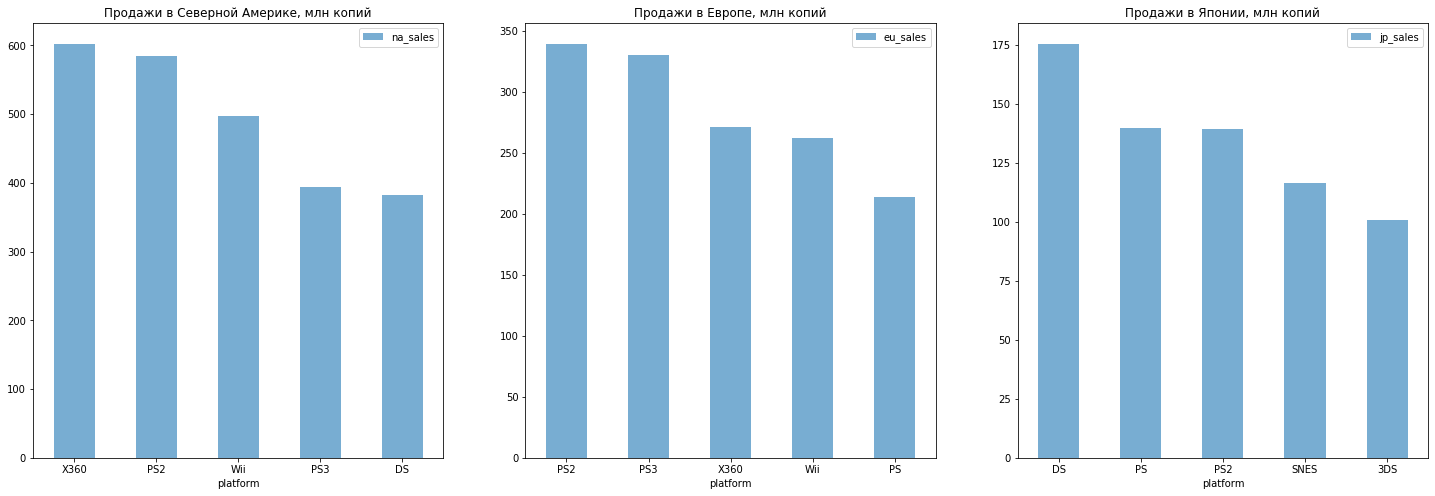

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(25,8))

grafik_region_test('platform', 'na_sales', 0)
grafik_region_test('platform', 'eu_sales', 1)
grafik_region_test('platform', 'jp_sales', 2)

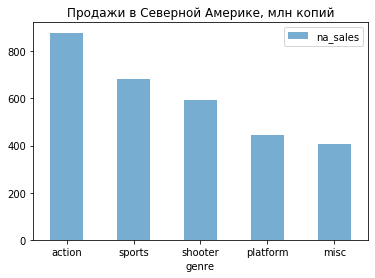

In [60]:
grafik_region('genre', 'na_sales')

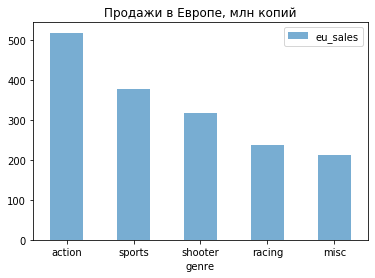

In [61]:
grafik_region('genre', 'eu_sales')

Популярность жанров в Северной Америке и Европе почти идентична: в топ3 входят экшены, спорт игры и шутеры. В Америке больше играют в платформеры, а в Европе - в гонки.

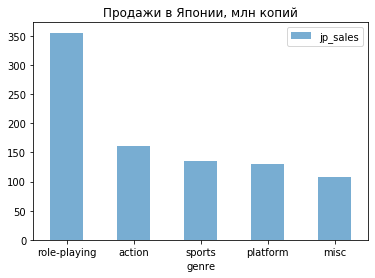

In [62]:
grafik_region('genre', 'jp_sales')

В Японии иная картина - здесь с большим отрывом лидирует жанр RPG. Далее с понижением в 60-70% экшен, спорт, платформеры.

### Влияние  ESRB на продажи

In [63]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Википедия говорит: <br>
E («Everyone») — «Для всех» от 6 лет и старше  Первоначально "K-A" (заменим) <br>
T («Teen») — «Подросткам»:  для лиц от 13 лет и старше <br>
M («Mature») — «Для взрослых» от 17 лет.  <br>
E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше» <br>
EC («Early childhood») — «Для детей младшего возраста  от 3 лет и старше <br>
AO («Adults Only 18+») — «Только для взрослых»: старше 18 лет.  <br>
RP («Rating Pending») — «Рейтинг ожидается» <br>

In [64]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E' 
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

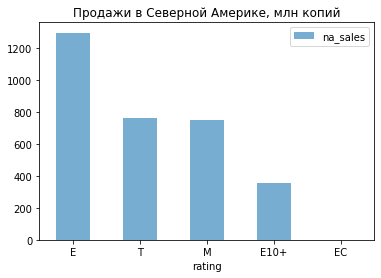

In [65]:
grafik_region('rating', 'na_sales')

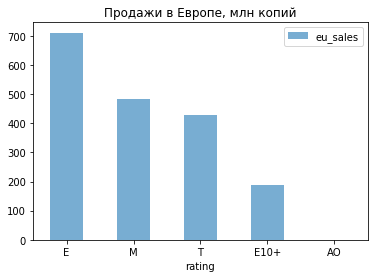

In [66]:
grafik_region('rating', 'eu_sales')

В Северной Америке и Европе картина представляется почти одинаковая. Игры для всех (E) популярнее всего,  далее ниже на 40-50% почти одинаковые продажи игр с рейтингом T и M (от 13 и от 17 лет). Далее игры от 10 лет.

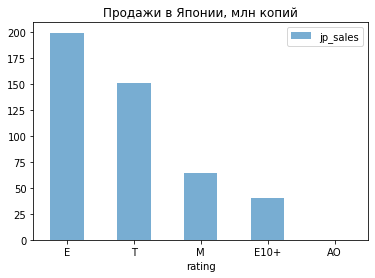

In [67]:
grafik_region('rating', 'jp_sales')

В Японии другое распределение: лидируют игры для всех E, затем с понижением 25% игры для подростков от 13 лет с рейтингом T. Далее - продажи игр с рейтингом М отстают от Т на 60%.

Предпочтения людей в Европе и Северной Америке имеют много общего. Самые популярные платформы - 
это PS2, PS3, X360, Wii, а любимые жанры - экшен, спорт и шутеры. Игры для всех с рейтингом E популярнее всего, далее почти одинаковый уровень у игр с рейтингом T и M (от 13 и от 17 лет). <br> Но в Японии вкусы другие: здесь больше играют в РПГ и используют платформу DS. А лидеры продаж - игры с рейтингом Е, затем рейтинг Т, на третьем месте с очень сильным отставанием расположился рейтинг М.

## Гипотезы

### Первая о рейтинге Xbox One и PC

Первая гипотеза о равенстве средних двух генеральных совокупностей: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br>

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. <br> 
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные. <br> <br>
Выборки независимые, используем метод ttest_ind из пакета scipy.stats. <br>
Зададим общепринятый критический уровень статистической значимости 0.05 и если p-value окажется меньше него - отвергнем гипотезу.

In [68]:
from scipy import stats as st

alpha = .05 

xone_rate = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc_rate = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']

results = st.ttest_ind(
    xone_rate, 
    pc_rate,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


In [69]:
np.var(xone_rate)

1.8965188383045526

In [70]:
np.var(pc_rate)

2.3377471580367684


Дисперсии получились разными 1,9 и 2,3. Задали методу ttest_ind параметр 'equal_var = False'<br>

p-уровень значимости - очень маленькое число, стремящееся к нулю. Значит, нулевая гипотеза отвергнута: средние пользовательские рейтинги платформ Xbox One и PC различаются. Посмотрим на значения.

In [71]:
'{:.2f}'.format(xone_rate.mean()) 

'6.52'

In [72]:
'{:.2f}'.format(pc_rate.mean()) 

'7.06'

Игры на PC имеют больший средний пользовательский рейтинг, чем игры на Xbox One.

In [73]:
xone_rate = df.query('platform == "XOne" and user_score > 0')
xone_rate.head()

,name,platform,year_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
165,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,role-playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента (v.2)</b> <br>
Ранее код, написанный ниже, не срабатывал, выходила ошибка. Сейчас ок <br> <br> 
 TypeError: can only concatenate str (not "float") to str

In [75]:
from scipy import stats as st

alpha = .05 

xone_rate_test = df.query('platform == "XOne" and user_score > 0')
pc_rate_test = df.query('platform == "PC" and user_score > 0')

results = st.ttest_ind(
    xone_rate, 
    pc_rate,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


<hr style="border: 1px solid #000;"> 

### Вторая о жанрах

Вторая гипотеза о равенстве средних двух генеральных совокупностей: cредние пользовательские рейтинги платформ Xbox One и PC . <br>

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые. <br> 
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные. <br> 
<br>
Выборки независимые, используем метод ttest_ind из пакета scipy.stats. <br>
Зададим общепринятый критический уровень статистической значимости 0.05 и если p-value окажется меньше него - отвергнем гипотезу.

У метода ttest_ind есть параметр equal_var. По-дефолту он равен True. И выбор equal_var мы обязаны объяснить. Этот параметр равен False, если дисперсии наших выборок отличаются, и равен True, если дисперсии наших выборок похожи.

Тест Левене позволяет нам определить, разные у нас дисперсии или нет. И в зависимости от ответа на этот вопрос задать параметр equal_var.

Посчитав здесь p-value и сравнив его с alpha, мы сможем ответить на вопрос, одинаковы ли дисперсии выборок (если p-value < alpha, то дисперсии статзначимо отличаются друг от друга), и в соответствии с этим правильно задать equal_var. После этого мы сможем провести тест.

In [82]:
from scipy import stats as st

alpha = .05 

action_rate = df[(df['genre'] == 'action') & (df['user_score'] > 0)]['user_score']
sports_rate = df[(df['genre'] == 'sports') & (df['user_score'] > 0)]['user_score']

from scipy.stats import levene

stat, p = levene(action_rate, sports_rate)
p


0.0001736640672727649

значение 0.00017 меньше нашей alpha, значит, дисперсим не равны. Задаем параметр equal_var = False. Теперь проведем t-тест и проверим гипотезу о равенстве средних выборок. 

In [83]:
results = st.ttest_ind(
    action_rate, 
    sports_rate,
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Значит, различие средних признается статистически незначимым.  

Cредние пользовательские рейтинги жанров Action и Sports примерно равны. Посмотрим на значения.

In [77]:
'{:.2f}'.format(action_rate.mean()) 

'7.05'

In [78]:
'{:.2f}'.format(sports_rate.mean()) 

'6.96'

Да, действительно, статистически значимых различий нет.

<hr style="border: 1px solid #000;"> 

## Вывод

Мы обработали датафрейм и подготовили данные для анализа: заменили названия столбцов,  по необходимости заменили тип данных. Посчитали суммарные продажи во всех регионах и добавили новый столбец, необходимый для дальнейших расчетов. Обработали значение 'tbd' значит to be determined - приравняли значение к nan.

В результате анализа мы выявили, что количество игр c 1990 г постоянно росло, пик достигнут в 2008-09 гг.
Потом идет спад, что связано с распространением смартфонов, соцсетей и ростом мобильных игр. <br>
Далее мы определили Топ-6 платформ с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS, PS. Выявили характерный срок, за который появляются новые и исчезают старые платформы, - он составляет около 10 лет. Пик популярности приходит через 5 лет после появления. На конец 2016 года лидируют платформы PS4, XOne и 3DS. Их жизненный цикл уже другой -  составляет уже 5 лет, пик наступает через 2г. В целом весь рынок падает. <br>
Построив диаграммы "ящик с усами", увидели, что продажи игр составляют в основном от 60 до 460 тыс копий. В среднем - 170 тыс. <br>
Проведя анализ оценок пользователей и критиков, выявили, что оценка пользователей слабо влияет на продажи. Пользователи при покупке ориентируются на оценки критиков. <br>
Нашли самые популярные жанры - ими оказались экшен, спорт и шутеры. Самые непопулярные - стратегии, приключения и головоломки. <br>


Проанализировали предпочтения в разных регионах. Вкусы людей в Европе и Северной Америке имеют много общего. Самые популярные платформы - это PS2, PS3, X360, Wii, а любимые жанры - экшен, спорт и шутеры. Игры для всех с рейтингом E популярнее всего, далее почти одинаковый уровень у игр от 13 и от 17 лет.
Но в Японии вкусы другие: здесь больше играют в РПГ и используют платформу DS. А лидеры продаж - игры для всех, затем от 13 лет, на третьем месте с очень сильным отставанием расположились игры от 17 лет. <br>

Гипотезы сформированы и проверены. Средние пользовательские рейтинги платформ Xbox One и PC различаются: игры на PC имеют больший средний пользовательский рейтинг, чем игры на Xbox One. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

В целом можно сказать, что рынок игр уже пережил свои лучшие годы. Возможно, 2020 год внес положительные коррективы, но тягаться с рынком мобильных игр очень трудно. Да и теперь каждая игра должна иметь мобильную версию. Бюджеты на создание одной игры растут, сроки разработки тоже, риски очень высокие (например, недавний эпикфэйл Cyberpunk 2077).  

В 2017 году лучше всего продавать игры для Play Station 4 жанра экшен с рейтингом Е для всех.